# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Obtain Enhanced Points of Interest (DMTI)

---

This notebook describes _Step 1: Obtain_ of OSEMN methodology, the process of obtaining EPOI from DMTI.

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.
# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Step 1.1 Spatial join of EPOI from DMTI to parcel polygons

---


## Enhanced Points of Interest (DMTI)

[McGill library](https://www.mcgill.ca/library/find/maps/epoi):
The Enhanced Points of Interest files are produced by DMTI Spatial Inc. The Enhanced Points of Interest (EPOI) file is a national database of over 1 million Canadian business and recreational points of interest. Engineered using CanMap® Streetfiles, each EPOI has been accurately geocoded and precisely placed. This location enriched point of interest database allows users to see and analyze selected point of interest data in a given geographic area, enabling applications such as retail site analysis, competitive and market research, business and tourism analysis. Features Include: Coordinate location (X, Y), Standard industry classification code (SIC), Business or recreational names with address information, and Common Address Flags (CAF) allowing users to identify records with identical addresses. It is recommended to use this with the dataset with CanMap Streetfiles (DMTI).


## Import dependencies
## Import dependencies

In [1]:
import pandas as pd
import geopandas as gpd
import os
from time import time

In [2]:
data_path = '../../data/'
epoi_path = data_path + 'teranet/epoi_gtha13/'
os.listdir(epoi_path)

['epoi_gtha13.sbx',
 'epoi_gtha13.sbn',
 'epoi_gtha13.dbf',
 'epoi_gtha13.shp.xml',
 'epoi_gtha13.cpg',
 'epoi_gtha13.shp',
 'epoi_gtha13.prj',
 'epoi_gtha13.shx']

In [3]:
gta_lu_path = data_path + 'teranet/ParcelLandUse/GTA/'
os.listdir(gta_lu_path)

['GTA_land_use_code.txt',
 'GTAparcel16LU12.shx',
 'with_epoi',
 'GTAparcel16LU12.prj',
 'GTAparcel16LU12.cpg',
 'GTAparcel16LU12.shp',
 'GTAparcel16LU12.dbf']

In [4]:
ham_lu_path = data_path + 'teranet/ParcelLandUse/Halmilton/'
os.listdir(ham_lu_path)

['Hparcel16LU10.prj',
 'Halmilton_Land_Use_Codes_2009_Original.pdf',
 'with_epoi',
 'HalLanduse_converted.csv',
 'Hparcel16LU10.cpg',
 'Hparcel16LU10.shp',
 'Hparcel16LU10.dbf',
 'Hparcel16LU10.shx']

## Load geometry of land use

----- GeoDataFrame loaded
in 126.35 seconds (2.11 minutes)
with 1,490,138 rows
and 13 columns
-- Column names:
 Index(['FID_1', 'PIN', 'SHAPE_Leng', 'SHAPE_Area', 'FID_2', 'OBJECTID',
       'PIN_1', 'municipali', 'LANDUSE', 'LengthM', 'AreaM2', 'Distance',
       'geometry'],
      dtype='object')
Taking the subset with columns
: ['PIN', 'geometry']

-- New column names:
 Index(['PIN', 'geometry'], dtype='object')


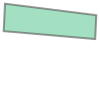

In [5]:
t = time()
lu_gta_gdf = gpd.read_file(gta_lu_path + 'GTAparcel16LU12.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gta_gdf.shape[0], lu_gta_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_gta_gdf.columns)

cols = ['PIN', 'geometry']

print("Taking the subset with columns\n:", cols)

lu_gta_gdf = lu_gta_gdf[cols]

print("\n-- New column names:\n", lu_gta_gdf.columns)

# lu_gta_gdf.plot(); # plotting the whole GeoDataFrame can take a very long time
lu_gta_gdf.iloc[0].geometry

----- GeoDataFrame loaded
in 14.17 seconds (0.24 minutes)
with 174,729 rows
and 13 columns
-- Column names:
 Index(['FID_1', 'PIN', 'SHAPE_Area', 'OBJECTID', 'FRONTAGE', 'DEPTH',
       'PROP_CODE', 'SITE_AREA', 'PIN_1', 'ID', 'Shape_Le_1', 'Shape_Ar_1',
       'geometry'],
      dtype='object')
Taking the subset with columns
: ['PIN', 'geometry']

-- New column names:
 Index(['PIN', 'geometry'], dtype='object')


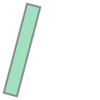

In [6]:
t = time()
lu_ham_gdf = gpd.read_file(ham_lu_path + 'Hparcel16LU10.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_ham_gdf.shape[0], lu_ham_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_ham_gdf.columns)

cols = ['PIN', 'geometry']

print("Taking the subset with columns\n:", cols)

lu_ham_gdf = lu_ham_gdf[cols]

print("\n-- New column names:\n", lu_ham_gdf.columns)

# lu_gta_gdf.plot(); # plotting the whole GeoDataFrame can take a very long time
lu_ham_gdf.iloc[0].geometry

## Load geometry of Enhanced Points of Interest (EPOI)

In [7]:
t = time()
epoi_gdf = gpd.read_file(epoi_path + 'epoi_gtha13.shp')
elapsed = time() - t
print("\n----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(epoi_gdf.shape[0], epoi_gdf.shape[1]) + 
      "\n-- Column names:\n", epoi_gdf.columns)

cols = ['POI_ID', 'geometry']

print("Taking the subset with columns\n:", cols)

epoi_gdf = epoi_gdf[cols]

print("\n-- New column names:\n", epoi_gdf.columns)


----- DataFrame loaded
in 38.90 seconds
with 317,874 rows
and 38 columns
-- Column names:
 Index(['OBJECTID', 'POI_ID', 'NAME', 'UNIT_SUITE', 'ADDRESS', 'DELIV_MODE',
       'CITY', 'MAF', 'PROV', 'POST_CODE', 'LOCATION', 'PHONE', 'FAX',
       'TOLL_FREE', 'WEBSITE', 'EPOI_TYPE', 'CAF', 'SIC_1', 'SIC_2', 'SIC_3',
       'SIC_4', 'SIC_5', 'SIC_6', 'NAICS_1', 'NAICS_2', 'NAICS_3', 'NAICS_4',
       'NAICS_5', 'SIC_MJ_GRP', 'SIC_DIV', 'X', 'Y', 'PREC_CODE', 'ATTRIBCODE',
       'STATUS', 'COMM_NAME', 'GRP_IND', 'geometry'],
      dtype='object')
Taking the subset with columns
: ['POI_ID', 'geometry']

-- New column names:
 Index(['POI_ID', 'geometry'], dtype='object')


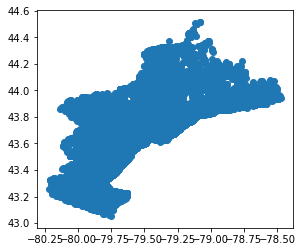

In [9]:
epoi_gdf.plot();

## Perform the spatial join of Teranet points with DA polygons
### Validate projections

In [10]:
epoi_gdf.crs

{'init': 'epsg:4326'}

In [11]:
lu_gta_gdf.crs

{'init': 'epsg:5320'}

In [12]:
lu_ham_gdf.crs

{'init': 'epsg:5320'}

### Convert Land Use CRS to EPSG:4326

In [13]:
t = time()
lu_gta_gdf = lu_gta_gdf.to_crs(epsg=4326)
elapsed = time() - t
print("New CRS:\n", lu_gta_gdf.crs, "\ntook {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60))

New CRS:
 {'init': 'epsg:4326', 'no_defs': True} 
took 221.83 seconds (3.70 minutes)


In [14]:
t = time()
lu_ham_gdf = lu_ham_gdf.to_crs(epsg=4326)
elapsed = time() - t
print("New CRS:\n", lu_ham_gdf.crs, "\ntook {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60))

New CRS:
 {'init': 'epsg:4326', 'no_defs': True} 
took 24.90 seconds (0.41 minutes)


### Perform the spatial joins
>Note: EPSG:4326 and WGS 84 represent the [same projection](https://spatialreference.org/ref/epsg/wgs-84/).

In [15]:
t = time()
lu_gta_epoi_gdf = gpd.sjoin(lu_gta_gdf, epoi_gdf, 
                            how='left', op='intersects')
lu_gta_epoi_gdf = lu_gta_epoi_gdf.drop('index_right', axis=1)
elapsed = time() - t
print("\n----- Spatial join completed, new GeoDataFrame created"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gta_epoi_gdf.shape[0], lu_gta_epoi_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_gta_epoi_gdf.columns)

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326', 'no_defs': True} != {'init': 'epsg:4326'})
  '(%s != %s)' % (left_df.crs, right_df.crs))



----- Spatial join completed, new GeoDataFrame created
in 268.32 seconds (4.47 minutes)
with 1,706,372 rows
and 3 columns
-- Column names:
 Index(['PIN', 'geometry', 'POI_ID'], dtype='object')


In [16]:
t = time()
lu_ham_epoi_gdf = gpd.sjoin(lu_ham_gdf, epoi_gdf, 
                            how='left', op='intersects')
elapsed = time() - t
print("\n----- Spatial join completed, new GeoDataFrame created"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_ham_epoi_gdf.shape[0], lu_ham_epoi_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_ham_epoi_gdf.columns)


----- Spatial join completed, new GeoDataFrame created
in 41.56 seconds (0.69 minutes)
with 188,957 rows
and 4 columns
-- Column names:
 Index(['PIN', 'geometry', 'index_right', 'POI_ID'], dtype='object')


### Validate results

In [22]:
epoi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 317874 entries, 0 to 317873
Data columns (total 2 columns):
POI_ID      317874 non-null object
geometry    317874 non-null object
dtypes: object(2)
memory usage: 4.9+ MB


In [23]:
lu_gta_epoi_gdf.info(null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1706372 entries, 0 to 1490137
Data columns (total 3 columns):
PIN         1706372 non-null object
geometry    1706372 non-null object
POI_ID      293293 non-null object
dtypes: object(3)
memory usage: 52.1+ MB


In [24]:
lu_ham_epoi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 188957 entries, 0 to 174728
Data columns (total 4 columns):
PIN            188957 non-null object
geometry       188957 non-null object
index_right    22645 non-null float64
POI_ID         22645 non-null object
dtypes: float64(1), object(3)
memory usage: 7.2+ MB


In [17]:
lu_gta_epoi_gdf['PIN'].value_counts()

212000009    14501
163530162     1410
140680100     1338
030220360     1288
248840893     1078
070820163      957
131410201      896
131510101      883
264550400      881
031570004      769
035560770      763
131960711      610
210979505      542
030340033      461
029760358      444
101440081      435
132530001      371
036410883      360
249530021      360
131420065      345
265290217      305
263350030      297
250560076      295
033010420      272
141700156      271
060000518      265
100489501      256
294210000      248
211710363      246
135120035      244
             ...  
140800515        1
073410022        1
134060379        1
103120121        1
700010008        1
032191125        1
140460182        1
720350115        1
143540062        1
075850192        1
029850184        1
132280026        1
250432004        1
104570110        1
103540211        1
250791181        1
267430104        1
133970031        1
164190599        1
132060193        1
032830130        1
103680015   

In [27]:
mask1 = lu_gta_epoi_gdf['PIN'] == '212000009'
lu_gta_epoi_gdf.loc[mask1, 'POI_ID'].value_counts()

POI4935435     1
POI4523642     1
POI10312894    1
POI3150362     1
POI5022441     1
POI5066894     1
POI5013917     1
POI4052336     1
POI4595732     1
POI3992857     1
POI3198911     1
POI4492927     1
POI10298006    1
POI10284038    1
POI5076744     1
POI5016479     1
POI5010386     1
POI10297511    1
POI3879788     1
POI5107087     1
POI5204365     1
POI4676040     1
POI3189812     1
POI4939413     1
POI3495121     1
POI4242047     1
POI3150637     1
POI3002619     1
POI10296171    1
POI10189149    1
              ..
POI4851390     1
POI5010389     1
POI4938164     1
POI10297450    1
POI5011160     1
POI5011094     1
POI10294501    1
POI10301096    1
POI4590680     1
POI4939491     1
POI10309022    1
POI10187850    1
POI4595437     1
POI3470002     1
POI5014023     1
POI4939134     1
POI4239056     1
POI5032443     1
POI5111052     1
POI4938761     1
POI4046172     1
POI5147814     1
POI10207872    1
POI4938749     1
POI5025839     1
POI10299780    1
POI10189023    1
POI4740106    

## Save results to a .csv file

In [25]:
lu_gta_epoi_gdf.columns

Index(['PIN', 'geometry', 'POI_ID'], dtype='object')

In [29]:
save_path = gta_lu_path + '/with_epoi/GTAparcel16LU12_epoi.shp'
t = time()
lu_gta_epoi_gdf.drop('geometry', axis=1).to_csv(save_path, index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60))

DataFrame saved to file:
 ../../data/teranet/ParcelLandUse/GTA//with_epoi/GTAparcel16LU12_epoi.shp 
took 3.74 seconds (0.06 minutes)


In [26]:
lu_ham_epoi_gdf.columns

Index(['PIN', 'geometry', 'index_right', 'POI_ID'], dtype='object')

In [30]:
save_path = ham_lu_path + '/with_epoi/Hparcel16LU10_epoi.shp'
t = time()
lu_ham_epoi_gdf.drop(['geometry', 'index_right'], axis=1).to_csv(save_path, index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60))

DataFrame saved to file:
 ../../data/teranet/ParcelLandUse/Halmilton//with_epoi/Hparcel16LU10_epoi.shp 
took 0.61 seconds (0.01 minutes)
